In [10]:
import numpy as np
import sys

import matplotlib.pyplot as plt
import matplotlib.ticker as ax
from matplotlib.ticker import MultipleLocator, FormatStrFormatter, LogLocator
from matplotlib import rc
rc('font',**{'family':'serif'})  # fontype matching Latex
from scipy.stats import linregress as lin


# this makes the plots to appear in the notebook and not in an external window
%matplotlib inline 
import glob
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 6.0)
import matplotlib
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
from scipy.special import gamma, factorial
from scipy.integrate import trapz
from astropy.cosmology import Planck15 as cosmo

In [11]:
DIM = 200

In [12]:
def load_binary_data(filename, dtype=np.float32):
    """
    We assume that the data was written
    with write_binary_data() (little endian).
    """
    f = open(filename, "rb")
    data = f.read()
    f.close()
    _data = np.fromstring(data, dtype)
    if sys.byteorder == 'big':
        _data = _data.byteswap()
    return _data

## global evolution file

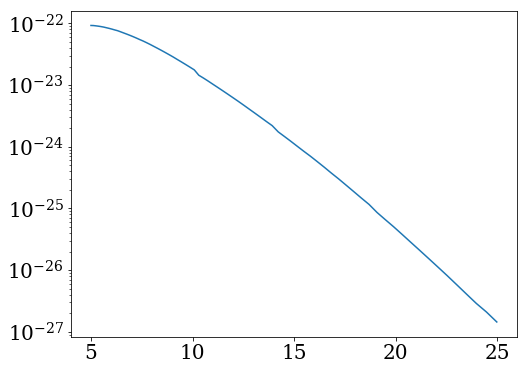

In [13]:
zp, xhip, tk, xe, ts, tcmb_zp, ja, xa,xheat, xion = np.loadtxt('./limfast-master/limfast_bt/Output_files/Ts_outs/global_evolution_Nsteps40_zprimestepfactor1.020_L_X3.2e+40_alphaX1.0_f_star100.0500_alpha_star0.5000_f_esc100.1000_alpha_esc-0.5000_Mturn5.0e+08_t_star0.5000_Pop2_200_500Mpc', usecols=(0,1,2,3,4,5,6,7,8,9),unpack=True)

ja *= (6. * 1.637e-11 / (1+zp)**4)

plt.semilogy(zp,ja)


## SFRD

/Users/masribas/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  if __name__ == '__main__':


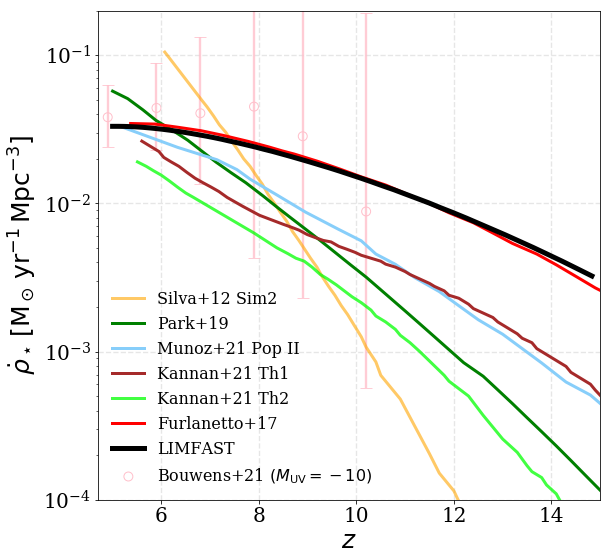

In [14]:
redarr = np.array([4.9,5.9,6.8, 7.9, 8.9, 10.2])
muvarr = - np.array([21.1, 20.93, 21.15, 20.93, 21.15, 21.19])
muvarrmin = - np.array([20.99, 20.84, 21.02, 20.65, 21.15, 21.19])
muvarrmax = - np.array([21.21, 21.02, 21.28, 21.21, 21.15, 21.19])
phi = np.array([0.79, 0.51,0.19,0.09,0.021,0.0042])*1e-3
phimax = np.array([0.95, 0.63,0.27,0.18,0.035,0.0087])*1e-3
phimin = np.array([0.66, 0.41,0.13,0.04,0.012,0.002])*1e-3
alpha = -np.array([1.74, 1.93, 2.06,2.23,2.33,2.38])
alphamax = -np.array([1.68, 1.85, 1.95,2.03,2.04,2.1])
alphamin = -np.array([1.8, 2.01, 2.17,2.43,2.52,2.66])

lsped = 3e18

Lstar = 10**((muvarr - 51.6)/-2.5) 
Lstarmin = 10**((muvarrmin - 51.6)/-2.5) 
Lstarmax = 10**((muvarrmax - 51.6)/-2.5) 


Mrange = np.linspace(-10,-100,1000)

sfrd = np.zeros(len(redarr))
sfrdmin = np.zeros(len(redarr))
sfrdmax = np.zeros(len(redarr))

def Lschechter(Lstari, alphai, phii,z):
    Lrange = 10**((Mrange - 51.6)/-2.5)
    funct = phii * (Lrange/Lstari)**alphai * np.exp(-Lrange/Lstari)
    return trapz(Lrange * funct, Lrange/Lstari)

for z in xrange(len(redarr)):
    sfrd[z] = Lschechter(Lstar[z], alpha[z], phi[z], redarr[z])/8e27
    sfrdmin[z] = Lschechter(Lstarmin[z], alphamax[z], phimin[z], redarr[z])/8e27
    sfrdmax[z] = Lschechter(Lstarmax[z], alphamin[z], phimax[z], redarr[z])/8e27

    
lasttwo = np.copy(sfrdmax[-2:])
#print lasttwo
sfrdmax[-2:] = sfrdmin[-2:]
sfrdmin[-2:] = lasttwo

loerr = sfrd - sfrdmin
uperr= sfrdmax - sfrd





filenames = np.array([])
for name in glob.glob('./limfast-master/limfast_bt/Boxes/SFRD_z*200_500*'):
    filenames = np.append(filenames,name)
    


meaneq = np.array([])
reds = np.array([])
for x in xrange(len(filenames)):
    filename = filenames[x]
    #print filename
    #filename = './limfast-master/Boxes/eq23mod/metallicity_z019.08_HIIfilter1_RHIImax50_200_300Mpc'
    
    data = load_binary_data(filename)
    data.shape = (DIM, DIM, DIM)
    data = data.reshape((DIM, DIM, DIM), order='F')
    #print (data)
    data = data.flatten()
    
    red = float(filename[40:46])
    #print red
    
    #plt.hist(data, bins=np.logspace(np.log10(np.min(data)),np.log10(np.max(data)),50))
    #plt.xscale('log')
    #print 'log10 mean Z/Z_sun = ',np.log10(np.mean(data))
    #print 'log10 sigma Z/Zsun = ',np.log10(np.std(data))
    meaneq = np.append(meaneq,(np.mean(data)))
    #print meaneq23
    #ads
    #print np.log10(np.mean(data))
    reds = np.append(reds, red)
    #print np.median(np.log10(data/0.014))
    #plt.show()
    
sortindx = np.argsort(reds)
reds = reds[sortindx]
meaneq = meaneq[sortindx]





plt.figure(figsize=(9,9))

np.savez('sfrd_obs',redarr,sfrd,loerr,uperr)


plt.errorbar(redarr,sfrd,yerr=[loerr,uperr], color='pink',linewidth=2.355,linestyle='none',alpha=0.8,capsize=6 ) 
plt.scatter(redarr,sfrd,facecolors='none', edgecolors='pink',s=80,label=r'Bouwens+21 $(M_{\rm UV}=-10)$',alpha=1)

z, sf = np.loadtxt('./silvasfrd.txt',usecols=(0,1),unpack=True)
sf = 10**sf
plt.semilogy(z,sf,color= 'orange',linewidth=3,label='Silva+12 Sim2',alpha=0.6)

z, sf = np.loadtxt('./parksfrd.txt',usecols=(0,1),unpack=True)
plt.semilogy(z,sf,color= 'g',linewidth=3,label='Park+19')

z, sf = np.loadtxt('./munozsfrd.txt',usecols=(0,1),unpack=True)
plt.semilogy(z,sf,color= 'LightSkyBlue',linewidth=3,label='Munoz+21 Pop II')



z, sf = np.loadtxt('./thsfrd1.txt',usecols=(0,1),unpack=True)
sf = 10**sf
plt.semilogy(z,sf,color= 'brown',linewidth=3,label='Kannan+21 Th1')

z, sf = np.loadtxt('./thsfrd2.txt',usecols=(0,1),unpack=True)
sf = 10**sf
plt.semilogy(z,sf,color= 'lime',linewidth=3,label='Kannan+21 Th2',alpha=0.74)




z, sf = np.loadtxt('./steve2017sfrd.txt',usecols=(0,1),unpack=True)
plt.semilogy(z,sf,color= 'r',linewidth=3,label='Furlanetto+17')




plt.semilogy(reds,meaneq,color= 'k',linewidth=5,label='LIMFAST')

supersfrd = np.copy(meaneq)
superz = np.copy(reds)







plt.xlabel(r'$z$',fontsize=25)
plt.ylabel(r'$\dot \rho_\star\,{\rm [M_\odot\,yr^{-1}\,Mpc^{-3}]}$',fontsize=25)
plt.legend(loc=3,frameon=False,prop={'size': 16})
plt.yscale('log')
plt.ylim(1e-4,2e-1)
plt.xlim(4.7,15)
ax = plt.gca()
plt.gca().set_facecolor("white")
plt.setp(ax.spines.values(), color='k')
plt.grid(True,color='0.9',linestyle='dashed',linewidth=1.4)

/Users/masribas/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  if __name__ == '__main__':


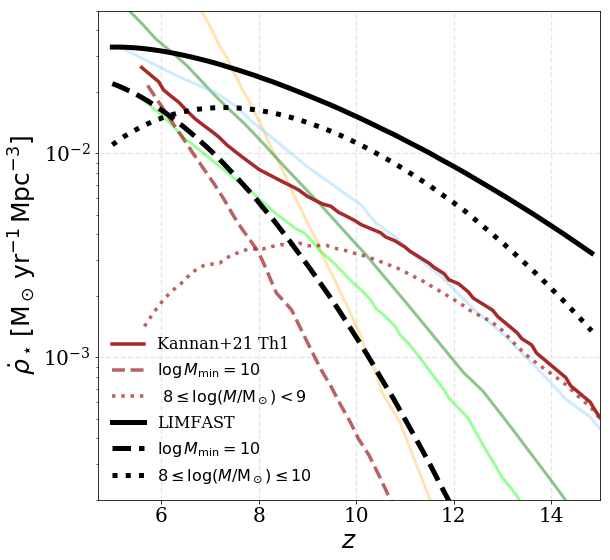

In [15]:



filenames = np.array([])
for name in glob.glob('./limfast-master/limfast_bt/Boxes/SFRD_z*200_500*'):
    filenames = np.append(filenames,name)
    


meaneq = np.array([])
reds = np.array([])
for x in xrange(len(filenames)):
    filename = filenames[x]
    #print filename
    #filename = './limfast-master/Boxes/eq23mod/metallicity_z019.08_HIIfilter1_RHIImax50_200_300Mpc'
    
    data = load_binary_data(filename)
    data.shape = (DIM, DIM, DIM)
    data = data.reshape((DIM, DIM, DIM), order='F')
    #print (data)
    data = data.flatten()
    
    red = float(filename[40:46])
    #print red
    
    #plt.hist(data, bins=np.logspace(np.log10(np.min(data)),np.log10(np.max(data)),50))
    #plt.xscale('log')
    #print 'log10 mean Z/Z_sun = ',np.log10(np.mean(data))
    #print 'log10 sigma Z/Zsun = ',np.log10(np.std(data))
    meaneq = np.append(meaneq,(np.mean(data)))
    #print meaneq23
    #ads
    #print np.log10(np.mean(data))
    reds = np.append(reds, red)
    #print np.median(np.log10(data/0.014))
    #plt.show()
    
sortindx = np.argsort(reds)
reds = reds[sortindx]
meaneq = meaneq[sortindx]





plt.figure(figsize=(9,9))



z, sf = np.loadtxt('./silvasfrd.txt',usecols=(0,1),unpack=True)
sf = 10**sf
plt.semilogy(z,sf,color= 'orange',linewidth=3,alpha=0.3)

z, sf = np.loadtxt('./parksfrd.txt',usecols=(0,1),unpack=True)
plt.semilogy(z,sf,color= 'g',linewidth=3,alpha=0.45)

z, sf = np.loadtxt('./munozsfrd.txt',usecols=(0,1),unpack=True)
plt.semilogy(z,sf,color= 'LightSkyBlue',linewidth=3,alpha=0.4)




z, sf = np.loadtxt('./thsfrd2.txt',usecols=(0,1),unpack=True)
sf = 10**sf
plt.semilogy(z,sf,color= 'lime',linewidth=3,alpha=0.4)




z, sf = np.loadtxt('./thsfrd1.txt',usecols=(0,1),unpack=True)
sf = 10**sf
plt.semilogy(z,sf,color= 'brown',linewidth=3.5,label='Kannan+21 Th1')


z, sf = np.loadtxt('./thsfrd10.txt',usecols=(0,1),unpack=True)
sf = 10**sf
plt.semilogy(z,sf,color= 'brown',linestyle='dashed',linewidth=3.5,
             label=r'$\log\,M_{\rm min}=10$',alpha=0.74)

z, sf = np.loadtxt('./thsfrd89.txt',usecols=(0,1),unpack=True)
sf = 10**sf
plt.semilogy(z,sf,color= 'brown',linestyle='dotted',linewidth=3.5,
             label=r' $8 \leq \log(M/{\rm M_\odot}) < 9$',alpha=0.74)






plt.semilogy(reds,meaneq,color= 'k',linewidth=5,label='LIMFAST')

supersfrd = np.copy(meaneq)
superz = np.copy(reds)








filenames = np.array([])
for name in glob.glob('./limfast-master/limfast_bt/Boxes/SFRD_M10_*200_500*'):
    filenames = np.append(filenames,name)
    


meaneq = np.array([])
reds = np.array([])
for x in xrange(len(filenames)):
    filename = filenames[x]
    #print filename
    #filename = './limfast-master/Boxes/eq23mod/metallicity_z019.08_HIIfilter1_RHIImax50_200_300Mpc'
    
    data = load_binary_data(filename)
    data.shape = (DIM, DIM, DIM)
    data = data.reshape((DIM, DIM, DIM), order='F')
    #print (data)
    data = data.flatten()
    
    red = float(filename[44:50])
    #print red
    
    #plt.hist(data, bins=np.logspace(np.log10(np.min(data)),np.log10(np.max(data)),50))
    #plt.xscale('log')
    #print 'log10 mean Z/Z_sun = ',np.log10(np.mean(data))
    #print 'log10 sigma Z/Zsun = ',np.log10(np.std(data))
    meaneq = np.append(meaneq,(np.mean(data)))
    #print meaneq23
    #ads
    #print np.log10(np.mean(data))
    reds = np.append(reds, red)
    #print np.median(np.log10(data/0.014))
    #plt.show()
    
sortindx = np.argsort(reds)
reds = reds[sortindx]
meaneq = meaneq[sortindx]



zz = np.copy(reds)
dash = np.copy(meaneq)


plt.semilogy(reds,meaneq,color= 'k',linestyle='dashed', linewidth=5,label=r'$\log\,M_{\rm min}=10$')



filenames = np.array([])
for name in glob.glob('./limfast-master/limfast_bt/Boxes/SFRD_m8_*200_500*'):
    filenames = np.append(filenames,name)
    


meaneq = np.array([])
reds = np.array([])
for x in xrange(len(filenames)):
    filename = filenames[x]
    #print filename
    #filename = './limfast-master/Boxes/eq23mod/metallicity_z019.08_HIIfilter1_RHIImax50_200_300Mpc'
    
    data = load_binary_data(filename)
    data.shape = (DIM, DIM, DIM)
    data = data.reshape((DIM, DIM, DIM), order='F')
    #print (data)
    data = data.flatten()
    
    red = float(filename[43:49])
    #print red
    
    #plt.hist(data, bins=np.logspace(np.log10(np.min(data)),np.log10(np.max(data)),50))
    #plt.xscale('log')
    #print 'log10 mean Z/Z_sun = ',np.log10(np.mean(data))
    #print 'log10 sigma Z/Zsun = ',np.log10(np.std(data))
    meaneq = np.append(meaneq,(np.mean(data)))
    #print meaneq23
    #ads
    #print np.log10(np.mean(data))
    reds = np.append(reds, red)
    #print np.median(np.log10(data/0.014))
    #plt.show()
    
sortindx = np.argsort(reds)
reds = reds[sortindx]
meaneq = meaneq[sortindx]


das = np.interp(reds, zz,dash)

resu = meaneq - das

plt.semilogy(reds,resu,color= 'k',linestyle='dotted', linewidth=5,label=r'$8 \leq \log(M/{\rm M_\odot}) \leq 10$')




plt.xlabel(r'$z$',fontsize=25)
plt.ylabel(r'$\dot \rho_\star\,{\rm [M_\odot\,yr^{-1}\,Mpc^{-3}]}$',fontsize=25)
plt.legend(loc=3,frameon=False,prop={'size': 16})
plt.yscale('log')
plt.ylim(2e-4,5e-2)
plt.xlim(4.7,15)
ax = plt.gca()
plt.gca().set_facecolor("white")
plt.setp(ax.spines.values(), color='k')
plt.grid(True,color='0.9',linestyle='dashed',linewidth=1.4)

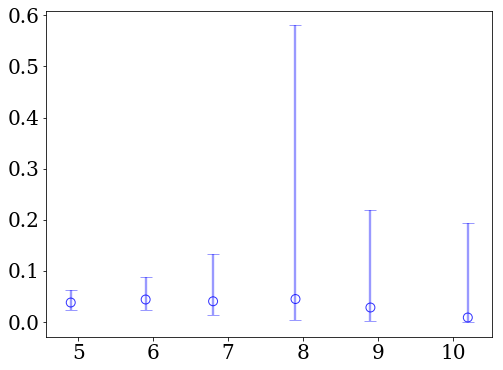

In [16]:
files = np.load('sfrd_obs.npz')
z = files['arr_0']
sfrd = files['arr_1']
loer = files['arr_2']
uper = files['arr_3']

plt.errorbar(redarr,sfrd,yerr=[loerr,uperr], color='b',linewidth=2.355,linestyle='none',alpha=0.4,capsize=6 ) 
plt.scatter(redarr,sfrd,facecolors='none', edgecolors='b',s=80,label='Bowens+21 (Muv=-12)',alpha=0.8)


## x_HI

In [17]:
filenames = np.array([])
for name in glob.glob('./limfast-master/limfast_bt/Boxes/xH_nohalos_*200_500*'):
    if '_0.05' in name:
        continue
    filenames = np.append(filenames,name)
    


meaneq = np.array([])
reds = np.array([])
for x in xrange(len(filenames)):
    filename = filenames[x]
    #print filename
    #filename = './limfast-master/Boxes/eq23mod/metallicity_z019.08_HIIfilter1_RHIImax50_200_300Mpc'
    
    data = load_binary_data(filename)
    data.shape = (DIM, DIM, DIM)
    data = data.reshape((DIM, DIM, DIM), order='F')
    #print (data)
    data = data.flatten()
    
    red = float(filename[46:52])
    #print red
    #afdsa
    #plt.hist(data, bins=np.logspace(np.log10(np.min(data)),np.log10(np.max(data)),50))
    #plt.xscale('log')
    #print 'log10 mean Z/Z_sun = ',np.log10(np.mean(data))
    #print 'log10 sigma Z/Zsun = ',np.log10(np.std(data))
    meaneq = np.append(meaneq,(np.mean(data)))
    #print meaneq23
    #ads
    #print np.log10(np.mean(data))
    reds = np.append(reds, red)
    #print np.median(np.log10(data/0.014))
    #plt.show()
    
sortindx = np.argsort(reds)
reds = reds[sortindx]
meaneq = meaneq[sortindx]










    
plt.figure(figsize=(8,5))



# Park
z, sf = np.loadtxt('./parkxHI.txt',usecols=(0,1),unpack=True)
plt.plot(z,sf,color= 'g',alpha=0.8,label='Park+19')

# faint
z, sf = np.loadtxt('./mesinger16xHifaint.txt',usecols=(0,1),unpack=True)
plt.plot(z,sf,color= 'm',alpha=0.8,label='Mesinger+16 F')

# Bright
z, sf = np.loadtxt('./mesingert16xHibright.txt',usecols=(0,1),unpack=True)
plt.plot(z,sf,color= 'c',alpha=0.8,label='Mesinger+16 B')


plt.errorbar([5.6,5.9],[0.04,0.06],yerr=[[0.05,0.07],[0.05,0.05]], color='b',linewidth=2.355,linestyle='none',alpha=0.4,capsize=6 ) 
plt.scatter([5.6,5.9],[0.04,0.06],facecolors='none', edgecolors='b',s=80,label='McGreer+15',alpha=0.8)

plt.errorbar(7,0.55,yerr=[[0.13],[0.11]], color='c',linewidth=2.555,linestyle='none',alpha=0.99,capsize=6 ) 
plt.scatter(7,0.55, marker='X',facecolors='none',edgecolors='c',s=80,label='Whitler+20',alpha=0.8)

plt.errorbar(7.5,0.21,yerr=[[0.19],[0.17]], color='lime',linewidth=2.555,linestyle='none',alpha=0.99,capsize=6 ) 
plt.scatter(7.5,0.21, marker='>',facecolors='none',edgecolors='lime',s=80,label='Greig+19',alpha=0.8)

plt.errorbar(8,0.76,yerr=[[0.0],[0.25]], color='g',linewidth=2.355,linestyle='none',alpha=0.4,capsize=6 ) 
plt.scatter(8,0.76, marker='^',edgecolors='g',s=80,label='Mason+19',alpha=0.5)

plt.errorbar(7.6,0.88,yerr=[[0.16],[0.05]], color='0.5',linewidth=2.555,linestyle='none',alpha=0.99,capsize=6 ) 
plt.scatter(7.6,0.88, marker='<',facecolors='none',edgecolors='0.5',s=80,label='Hoag+19',alpha=0.8)

plt.errorbar(7.1,0.4,yerr=[[0.19],[0.21]], color='m',linewidth=2.355,linestyle='none',alpha=1,capsize=6 ) 
plt.scatter(7.1,0.4,facecolors='none', edgecolors='m',s=80,label='Greig+16',alpha=0.8)

plt.errorbar([7.09,7.54],[0.48,0.6],yerr=[[0.26,0.23],[0.26,0.2]], color='orange',linewidth=2.555,linestyle='none',alpha=1,capsize=6 ) 
plt.scatter([7.09,7.54],[0.48,0.6], marker='s',facecolors='none',edgecolors='orange',s=80,label='Davies+18',alpha=0.8)



for x in range(5):
    plt.scatter([],[],label=' ',color='w',alpha=0)
#plt.plot(zp,xhip)

plt.plot(reds,meaneq,color= 'k',linewidth=2.6)

plt.xlabel(r'$z$',fontsize=25)
plt.ylabel(r'$x_{\rm HI}$',fontsize=25)
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1],loc='best',frameon=False,prop={'size': 14},ncol=2,labelspacing = 0.7)
plt.xlim(5,15)
plt.ylim(0,1)
ax = plt.gca()
plt.gca().set_facecolor("white")
plt.setp(ax.spines.values(), color='k')
plt.grid(True,color='0.9',linestyle='dashed',linewidth=1.4)


/Users/masribas/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  if __name__ == '__main__':


ValueError: could not convert string to float: zstart

## Metallicity

In [ ]:
import astropy
from astropy.cosmology import Planck15 as cosmo
import astropy.units as u




filenames = np.array([])
for name in glob.glob('./limfast-master/limfast_bt/Boxes/meta*200_500*'):
    filenames = np.append(filenames,name)
    


meaneq = np.array([])
reds = np.array([])
for x in xrange(len(filenames)):
    filename = filenames[x]
    #print filename
    #filename = './limfast-master/Boxes/eq23mod/metallicity_z019.08_HIIfilter1_RHIImax50_200_300Mpc'
    
    data = load_binary_data(filename)
    data.shape = (DIM, DIM, DIM)
    data = data.reshape((DIM, DIM, DIM), order='F')
    #print (data)
    data = data.flatten()
    
    red = float(filename[46:52])
    #print red
    #afdsa
    #plt.hist(data, bins=np.logspace(np.log10(np.min(data)),np.log10(np.max(data)),50))
    #plt.xscale('log')
    #print 'log10 mean Z/Z_sun = ',np.log10(np.mean(data))
    #print 'log10 sigma Z/Zsun = ',np.log10(np.std(data))
    meaneq = np.append(meaneq,(np.sum(data)))
    #print meaneq23
    #ads
    #print np.log10(np.mean(data))
    reds = np.append(reds, red)
    #print np.median(np.log10(data/0.014))
    #plt.show()
    
sortindx = np.argsort(reds)
redsmet = reds[sortindx]
meaneqmet = meaneq[sortindx]



filenames = np.array([])
for name in glob.glob('./limfast-master/limfast_bt/Boxes/gas*200_500*'):
    filenames = np.append(filenames,name)
    


meaneq = np.array([])
reds = np.array([])
for x in xrange(len(filenames)):
    filename = filenames[x]
    #print filename
    #filename = './limfast-master/Boxes/eq23mod/metallicity_z019.08_HIIfilter1_RHIImax50_200_300Mpc'
    
    data = load_binary_data(filename)
    data.shape = (DIM, DIM, DIM)
    data = data.reshape((DIM, DIM, DIM), order='F')
    #print (data)
    data = data.flatten()
    
    red = float(filename[44:50])
    #print red
    #afdsa
    #plt.hist(data, bins=np.logspace(np.log10(np.min(data)),np.log10(np.max(data)),50))
    #plt.xscale('log')
    #print 'log10 mean Z/Z_sun = ',np.log10(np.mean(data))
    #print 'log10 sigma Z/Zsun = ',np.log10(np.std(data))
    meaneq = np.append(meaneq,(np.sum(data)))
    #print meaneq23
    #ads
    #print np.log10(np.mean(data))
    reds = np.append(reds, red)
    #print np.median(np.log10(data/0.014))
    #plt.show()
    
sortindx = np.argsort(reds)
redsgas = reds[sortindx]
meaneqgas = meaneq[sortindx]

metal = meaneqmet/meaneqgas / 0.014 

    
plt.figure(figsize=(8,5))
plt.plot(redsmet,metal,color= 'k',label='All collapsed objects')#     , label='collapsed structure')

plt.plot(redsmet,metal/3.,color= 'k',linestyle='dashed')# 




filenames = np.array([])
for name in glob.glob('./limfast-master/limfast_bt/Boxes/halo10/meta*200_500*'):
    filenames = np.append(filenames,name)
    


meaneq = np.array([])
reds = np.array([])
for x in xrange(len(filenames)):
    filename = filenames[x]
    #print filename
    #filename = './limfast-master/Boxes/eq23mod/metallicity_z019.08_HIIfilter1_RHIImax50_200_300Mpc'
    
    data = load_binary_data(filename)
    data.shape = (DIM, DIM, DIM)
    data = data.reshape((DIM, DIM, DIM), order='F')
    #print (data)
    data = data.flatten()
    
    red = float(filename[53:59])
    #print red
    #afdsa
    #plt.hist(data, bins=np.logspace(np.log10(np.min(data)),np.log10(np.max(data)),50))
    #plt.xscale('log')
    #print 'log10 mean Z/Z_sun = ',np.log10(np.mean(data))
    #print 'log10 sigma Z/Zsun = ',np.log10(np.std(data))
    meaneq = np.append(meaneq,(np.sum(data)))
    #print meaneq23
    #ads
    #print np.log10(np.mean(data))
    reds = np.append(reds, red)
    #print np.median(np.log10(data/0.014))
    #plt.show()
    
sortindx = np.argsort(reds)
redsmet = reds[sortindx]
meaneqmet = meaneq[sortindx]



filenames = np.array([])
for name in glob.glob('./limfast-master/limfast_bt/Boxes/halo10/gas*200_500*'):
    filenames = np.append(filenames,name)
    


meaneq = np.array([])
reds = np.array([])
for x in xrange(len(filenames)):
    filename = filenames[x]
    #print filename
    #filename = './limfast-master/Boxes/eq23mod/metallicity_z019.08_HIIfilter1_RHIImax50_200_300Mpc'
    
    data = load_binary_data(filename)
    data.shape = (DIM, DIM, DIM)
    data = data.reshape((DIM, DIM, DIM), order='F')
    #print (data)
    data = data.flatten()
    
    red = float(filename[51:57])
    #print red
    #afdsa
    #plt.hist(data, bins=np.logspace(np.log10(np.min(data)),np.log10(np.max(data)),50))
    #plt.xscale('log')
    #print 'log10 mean Z/Z_sun = ',np.log10(np.mean(data))
    #print 'log10 sigma Z/Zsun = ',np.log10(np.std(data))
    meaneq = np.append(meaneq,(np.sum(data)))
    #print meaneq23
    #ads
    #print np.log10(np.mean(data))
    reds = np.append(reds, red)
    #print np.median(np.log10(data/0.014))
    #plt.show()
    
sortindx = np.argsort(reds)
redsgas = reds[sortindx]
meaneqgas = meaneq[sortindx]

metal = meaneqmet/meaneqgas / 0.014 


plt.plot(redsmet,metal,color= 'powderblue',linewidth=3,label=r'$M < 10^{10}\,{\rm M_\odot}$')#  
plt.plot(redsmet,metal/3.,color= 'powderblue',linewidth=3,linestyle='dashed')




plt.xlabel(r'$z$',fontsize=25)
plt.ylabel(r'$Z/Z_\odot$',fontsize=25)
plt.xlim(5,15)
#plt.ylim(1e-2,2e-1)
ax = plt.gca()
plt.gca().set_facecolor("white")
plt.setp(ax.spines.values(), color='k')
plt.grid(True,color='0.9',linestyle='dashed',linewidth=1.4)
plt.text(13,0.054,r'$y_z=0.03$',fontsize=16)
plt.text(13,0.022,r'$y_z=0.01$',fontsize=16)


# 130606A z=5.91, logZ = -1.58+-0.08 Bolmer 2019https://ui.adsabs.harvard.edu/abs/2019A%26A...623A..43B/abstract
lower = np.abs(10**(-1.64)- 10**-1.58)
hier = 10**(-1.5)- 10**-1.58
print lower
print hier
val = 10**-1.58
assym = [lower,hier]
plt.errorbar(5.91, val, yerr=0.004,  fmt='o', color='goldenrod', ms=8, elinewidth=2, capsize=5, mew=2,  label='GRB 130606A')



lower = np.abs(10**(-1.9)- 10**-1.6)
hier = 10**(-1.3)- 10**-1.6
print lower
print hier
val = 10**-1.6

plt.errorbar(6.26, val, yerr=[[0.012],[0.02]],   fmt='o', color='g', ms=8, elinewidth=2, capsize=5, mew=2,  label='GRB 050904')

plt.legend(loc='best',frameon=False,prop={'size': 16})

"""baryon = cosmo.Ob(redsmet) * cosmo.critical_density(redsmet) / 2e33 * 3.08e24**3 * (500/(1+redsmet))**3

metal = meaneqmet/baryon / 0.014

    
plt.figure(figsize=(8,5))
z, sf = np.loadtxt('./steve2017metal.txt',usecols=(0,1),unpack=True)
sf = 10**sf
plt.semilogy(z,sf,color= 'r',linewidth=2,label='Furlanetto+17',alpha=0.6)



plt.semilogy(redsmet,metal,color= 'k', label='cosmic mean')
plt.xlabel(r'$z$',fontsize=25)
plt.ylabel(r'$Z/Z_\odot$',fontsize=25)
plt.legend(loc='best',frameon=False,prop={'size': 16})
plt.xlim(5,15)
#plt.ylim(5e-6,3e-3)
ax = plt.gca()
plt.gca().set_facecolor("white")
plt.setp(ax.spines.values(), color='k')
plt.grid(True,color='0.9',linestyle='dashed',linewidth=1.4)"""


## metallicity distributions

In [18]:


filenames = np.array([])
for name in glob.glob('./limfast-master/limfast_bt/Boxes/metal_mass_z014.22_HIIfilter1_RHIImax50_200_500Mpc'):
    filenames = np.append(filenames,name)
    


meaneq = np.array([])
reds = np.array([])
for x in xrange(len(filenames)):
    filename = filenames[x]
    #print filename
    #filename = './limfast-master/Boxes/eq23mod/metallicity_z019.08_HIIfilter1_RHIImax50_200_300Mpc'
    
    data = load_binary_data(filename)
    data.shape = (DIM, DIM, DIM)
    data = data.reshape((DIM, DIM, DIM), order='F')
    #print (data)
    data = data.flatten()
    
    red = float(filename[46:52])
    #print red
    #afdsa
    #plt.hist(data, bins=np.logspace(np.log10(np.min(data)),np.log10(np.max(data)),50))
    #plt.xscale('log')
    #print 'log10 mean Z/Z_sun = ',np.log10(np.mean(data))
    #print 'log10 sigma Z/Zsun = ',np.log10(np.std(data))
    #meaneq = np.append(meaneq,(np.sum(data)))
    #print meaneq23
    #ads
    #print np.log10(np.mean(data))
    #reds = np.append(reds, red)
    #print np.median(np.log10(data/0.014))
    #plt.show()
    
metalmass = data



filenames = np.array([])
for name in glob.glob('./limfast-master/limfast_bt/Boxes/gas_mass_z014.22_HIIfilter1_RHIImax50_200_500Mpc'):
    filenames = np.append(filenames,name)
for x in xrange(len(filenames)):
    filename = filenames[x]
    #print filename
    #filename = './limfast-master/Boxes/eq23mod/metallicity_z019.08_HIIfilter1_RHIImax50_200_300Mpc'
    
    data = load_binary_data(filename)
    data.shape = (DIM, DIM, DIM)
    data = data.reshape((DIM, DIM, DIM), order='F')
    #print (data)
    gasmass = data.flatten()
    




/Users/masribas/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  if __name__ == '__main__':


[1.0135879e-07 6.5304822e+02 4.2303870e+02 ... 4.7830396e+02 1.0995406e-07
 6.5055048e+02]


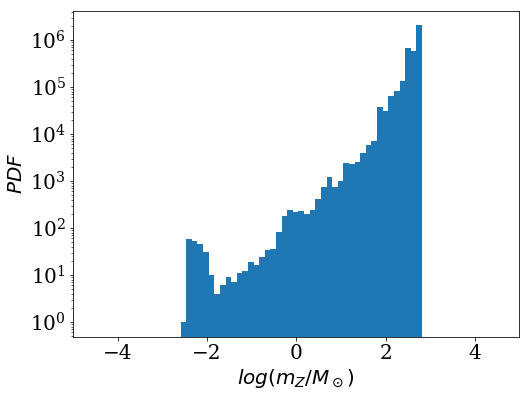

In [26]:
plt.hist(np.log10(metalmass),log=True,bins=100)
plt.xlim(-5,5)
plt.xlabel(r'$log(m_Z/M_\odot)$',fontsize=20)
plt.ylabel(r'$PDF$',fontsize=20)
print metalmass

Text(0,0.5,'$PDF$')

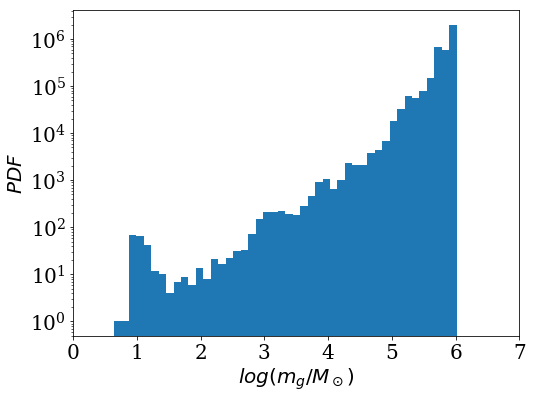

In [27]:
plt.hist(np.log10(gasmass),log=True,bins=100)
plt.xlim(0,7)
plt.xlabel(r'$log(m_g/M_\odot)$',fontsize=20)
plt.ylabel(r'$PDF$',fontsize=20)

Text(0,0.5,'$PDF$')

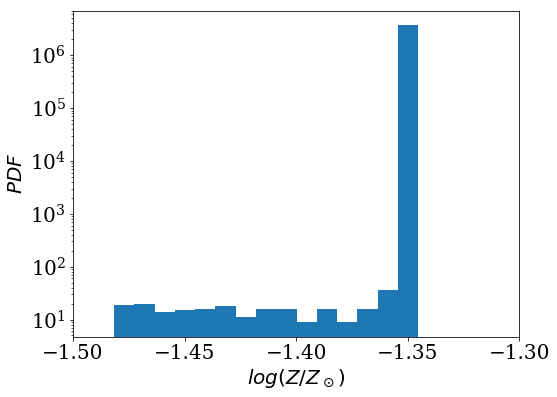

In [29]:
plt.hist(np.log10(metalmass/gasmass/0.014),log=True,bins=100)
plt.xlim(-1.5,-1.3)
plt.xlabel(r'$log(Z/Z_\odot)$',fontsize=20)
plt.ylabel(r'$PDF$',fontsize=20)

# intensities need to account for the 90% retention of ionizing photons (fesc=10%) and the escape of the own line.

In [56]:
def sfrlya(sfr):
    return sfr * 1.3e42, 1215.67
    
def sfrha(sfr):
    return sfr * 1.26e41, 6563.

def sfrhb(sfr):
    return sfr * 4.41e40, 4861.

def sfroii(sfr):
    return sfr * 7.14e40, 3726.

def sfroiii(sfr):
    return sfr * 1.32e41, 5007.


def dL(z):
    return cosmo.luminosity_distance(z).to('cm')

def Chir(z):
    return cosmo.comoving_distance(z)

def hubble(z):
    return cosmo.H(z)


## 21 cm

/Users/masribas/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  if __name__ == '__main__':


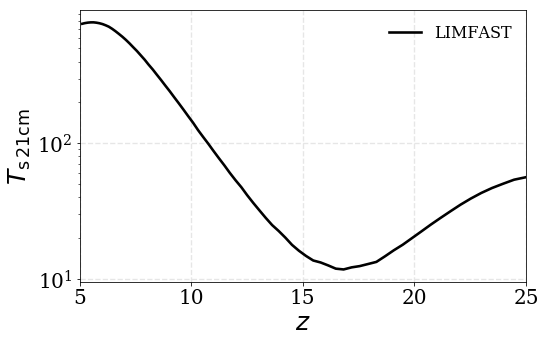

In [57]:
filenames = np.array([])
for name in glob.glob('./limfast-master/limfast_bt/Boxes/Ts_z*200_500*'):
    filenames = np.append(filenames,name)
    


meaneq = np.array([])
reds = np.array([])
for x in xrange(len(filenames)):
    filename = filenames[x]
    #print filename
    #filename = './limfast-master/Boxes/eq23mod/metallicity_z019.08_HIIfilter1_RHIImax50_200_300Mpc'
    
    data = load_binary_data(filename)
    data.shape = (DIM, DIM, DIM)
    data = data.reshape((DIM, DIM, DIM), order='F')
    #print (data)
    data = data.flatten()
    
    red = float(filename[38:44])
    #print red
    #afdsa
    #plt.hist(data, bins=np.logspace(np.log10(np.min(data)),np.log10(np.max(data)),50))
    #plt.xscale('log')
    #print 'log10 mean Z/Z_sun = ',np.log10(np.mean(data))
    #print 'log10 sigma Z/Zsun = ',np.log10(np.std(data))
    meaneq = np.append(meaneq,(np.mean(data)))
    #print meaneq23
    #ads
    #print np.log10(np.mean(data))
    reds = np.append(reds, red)
    #print np.median(np.log10(data/0.014))
    #plt.show()
    
sortindx = np.argsort(reds)
reds = reds[sortindx]
meaneq = meaneq[sortindx]    * 0.9
    
plt.figure(figsize=(8,5))


z, sf = np.loadtxt('./thha1.txt',usecols=(0,1),unpack=True)
sf *= 1e-23
#plt.semilogy(z,sf,color= 'salmon',linewidth=2,label='Kannan+21b Th1',alpha=0.6)

z, sf = np.loadtxt('./thha2.txt',usecols=(0,1),unpack=True)
sf *= 1e-23
#plt.semilogy(z,sf,color= 'olive',linewidth=2,label='Kannan+21b Th2',alpha=0.6)



theo =  sfrha(supersfrd)[0]*sfrha(5)[1]*1e-13*Chir(superz)**2/ hubble(superz)/4./np.pi/dL(superz)**2*(1+superz)**2
#print theo
#plt.semilogy(superz,theo,color= '0.8', linewidth=2.6, linestyle='dashed', label='z=0')


#plt.semilogy(zp,ts)

plt.semilogy(reds,meaneq,color= 'k',linewidth=2.6, label='LIMFAST')
plt.xlabel(r'$z$',fontsize=25)
plt.ylabel(r'$T_{\rm s\, 21cm}$',fontsize=25) # {\rm [erg\, s^{-1}\,cm^{-2}\,Hz^{-1}\,sr^{-1}]}
plt.xlim(5,25)
plt.legend(loc='best',frameon=False,prop={'size': 16})
ax = plt.gca()
plt.gca().set_facecolor("white")
plt.setp(ax.spines.values(), color='k')
plt.grid(True,color='0.9',linestyle='dashed',linewidth=1.4)


## T_b

/Users/masribas/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  if __name__ == '__main__':


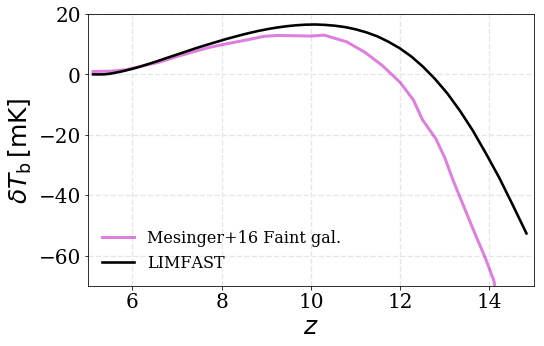

In [58]:
filenames = np.array([])
for name in glob.glob('./limfast-master/limfast_bt/Boxes/delta_T*'):
    filenames = np.append(filenames,name)
    


meaneq = np.array([])
reds = np.array([])
for x in xrange(len(filenames)):
    filename = filenames[x]
    #print filename
    #filename = './limfast-master/Boxes/eq23mod/metallicity_z019.08_HIIfilter1_RHIImax50_200_300Mpc'
    
    data = load_binary_data(filename)
    data.shape = (DIM, DIM, DIM)
    data = data.reshape((DIM, DIM, DIM), order='F')
    #print (data)
    data = data.flatten()
    
    red = float(filename[43:49])
    #print red
    #afdsa
    #plt.hist(data, bins=np.logspace(np.log10(np.min(data)),np.log10(np.max(data)),50))
    #plt.xscale('log')
    #print 'log10 mean Z/Z_sun = ',np.log10(np.mean(data))
    #print 'log10 sigma Z/Zsun = ',np.log10(np.std(data))
    meaneq = np.append(meaneq,(np.mean(data)))
    #print meaneq23
    #ads
    #print np.log10(np.mean(data))
    reds = np.append(reds, red)
    #print np.median(np.log10(data/0.014))
    #plt.show()
    
sortindx = np.argsort(reds)
reds = reds[sortindx]
meaneq = meaneq[sortindx]    * 0.9
    
plt.figure(figsize=(8,5))


#z, sf = np.loadtxt('./21cmmunallz.txt',usecols=(0,1),unpack=True)
#plt.plot(z,sf,color= 'brown',linewidth=3,label='Munoz+21 All')

#z, sf = np.loadtxt('./21cmmunnovel.txt',usecols=(0,1),unpack=True)
#plt.plot(z,sf,color= 'LightSkyBlue',linewidth=3,label='Munoz+21 no vel.')


z, sf = np.loadtxt('./21cmmunomesi.txt',usecols=(0,1),unpack=True)
plt.plot(z,sf,color= 'm',linewidth=3,alpha=0.5,label='Mesinger+16 Faint gal.')




plt.plot(reds,meaneq,color= 'k',linewidth=2.6, label='LIMFAST')
plt.xlabel(r'$z$',fontsize=25)
plt.ylabel(r'$\delta T_{\rm b}\,{\rm [mK]}$',fontsize=25) # {\rm [erg\, s^{-1}\,cm^{-2}\,Hz^{-1}\,sr^{-1}]}
plt.xlim(5,15)
plt.ylim(-70,20)
plt.legend(loc='best',frameon=False,prop={'size': 16})
ax = plt.gca()
plt.gca().set_facecolor("white")
plt.setp(ax.spines.values(), color='k')
plt.grid(True,color='0.9',linestyle='dashed',linewidth=1.4)


## Lya

/Users/masribas/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  if __name__ == '__main__':


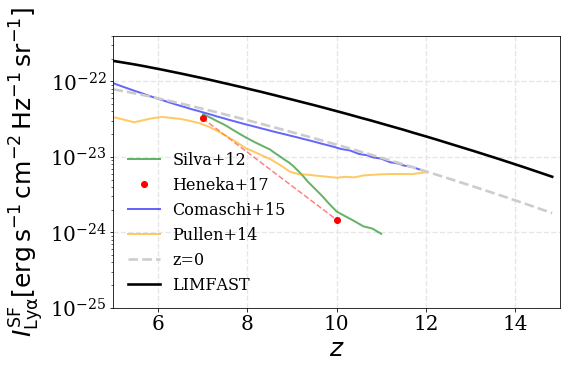

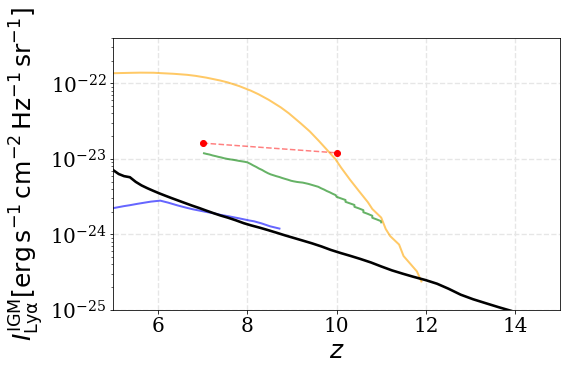

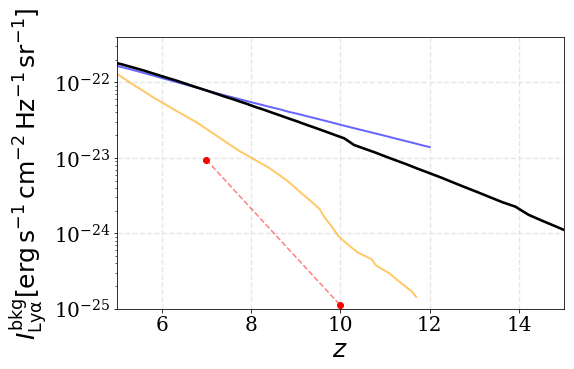

In [59]:
plt.figure(figsize=(8,5))


#theo = sfrlya(supersfrd)[0]*sfrlya(5)[1]*1e-13/ hubble(superz)/4./np.pi/3.08e24**2
#print theo
#plt.semilogy(superz,theo,color= 'b',linestyle='dashed', linewidth=4.6, label='z=0')


#theo =  sfrlya(supersfrd)[0]*3e5/ hubble(superz)/4./np.pi/3.08e24**2 /2.47e15 
#print theo
#plt.semilogy(superz,theo,color= 'lime',linestyle='dashed', linewidth=2.6, label='z=0 v2')

filenames = np.array([])
for name in glob.glob('./limfast-master/limfast_bt/Boxes/I_HI1216A_z*200_500*'):
    if '_z0_' in name:
        continue
    filenames = np.append(filenames,name)
    

meaneq = np.array([])
reds = np.array([])
for x in xrange(len(filenames)):
    filename = filenames[x]
    #print filename
    #filename = './limfast-master/Boxes/eq23mod/metallicity_z019.08_HIIfilter1_RHIImax50_200_300Mpc'
    
    data = load_binary_data(filename)
    data.shape = (DIM, DIM, DIM)
    data = data.reshape((DIM, DIM, DIM), order='F')
    #print (data)
    data = data.flatten()
    
    red = float(filename[45:51])
    #print red
    #afdsa
    #plt.hist(data, bins=np.logspace(np.log10(np.min(data)),np.log10(np.max(data)),50))
    #plt.xscale('log')
    #print 'log10 mean Z/Z_sun = ',np.log10(np.mean(data))
    #print 'log10 sigma Z/Zsun = ',np.log10(np.std(data))
    meaneq = np.append(meaneq,(np.mean(data)))
    #print meaneq23
    #ads
    #print np.log10(np.mean(data))
    reds = np.append(reds, red)
    #print np.median(np.log10(data/0.014))
    #plt.show()
    
sortindx = np.argsort(reds)
reds = reds[sortindx]
meaneq = meaneq[sortindx]
    
lyasf = np.copy(meaneq)


z, sf = np.loadtxt('./silvalyanuinusf.txt',usecols=(0,1),unpack=True)
sf /= (2.47e15/(1+z))
plt.semilogy(z,sf,color= 'g',linewidth=2,label='Silva+12',alpha=0.6)

hz = np.array([7,10])
hlya = np.array([1e-8,3.3e-10])
hlya /= (2.47e15/(1+hz))

plt.plot(hz,hlya, 'ro',label='Heneka+17')
plt.plot(hz,hlya, 'r',linestyle='dashed',alpha=0.5)

z, sf = np.loadtxt('./comaschilyasf.txt',usecols=(0,1),unpack=True)
sf /= (2.47e15/(1+z))
sf*=1e-6
plt.semilogy(z,sf,color= 'b',linewidth=2,label='Comaschi+15',alpha=0.6)

z, sf = np.loadtxt('./pullenlyasf.txt',usecols=(0,1),unpack=True)
sf /= (2.47e15/(1+z))
sf*=1e-6
plt.semilogy(z,sf,color= 'orange',linewidth=2,label='Pullen+14',alpha=0.6)

hz = np.array([7,10])
hlya = np.array([1.8e-8,3.3e-10])
hlya /= (2.47e15/(1+hz))

theo =  sfrlya(supersfrd)[0]*sfrlya(5)[1]*1e-13*Chir(superz)**2/ hubble(superz)/4./np.pi/dL(superz)**2*(1+superz)**2
#print theo
plt.semilogy(superz,theo,color= '0.8', linewidth=2.6, linestyle='dashed', label='z=0')

plt.semilogy(reds,meaneq,color= 'k',linewidth=2.6, label='LIMFAST')

#plt.semilogy(reds,lyasf+lyaigm,color= 'k', label=r'${\rm Ly\alpha_{total}}$')


plt.xlabel(r'$z$',fontsize=25)
plt.ylabel(r'$I_{\rm Ly\alpha}^{\rm SF} {\rm [erg\, s^{-1}\,cm^{-2}\,Hz^{-1}\,sr^{-1}]}$',fontsize=25)
ax = plt.gca()
plt.gca().set_facecolor("white")
plt.setp(ax.spines.values(), color='k')
plt.grid(True,color='0.9',linestyle='dashed',linewidth=1.4)
plt.legend(loc='best',frameon=False,prop={'size': 16})
plt.xlim(5,15)
plt.ylim(1e-25,4e-22)
plt.show()








plt.figure(figsize=(8,5))



z, sf = np.loadtxt('./silvalyanuinuigm.txt',usecols=(0,1),unpack=True)
sf /= (2.47e15/(1+z))
plt.semilogy(z,sf,color= 'g',linewidth=2,label='Silva+12',alpha=0.6)

z, sf = np.loadtxt('./comaschilyaigm.txt',usecols=(0,1),unpack=True)
sf /= (2.47e15/(1+z))
sf*=1e-6
plt.semilogy(z,sf,color= 'b',linewidth=2,label='Comaschi+15',alpha=0.6)

z, sf = np.loadtxt('./pullenigmrec.txt',usecols=(0,1),unpack=True)
sf /= (2.47e15/(1+z))
sf*=1e-6
plt.semilogy(z,sf,color= 'orange',linewidth=2,label='Pullen+14',alpha=0.6)


hz = np.array([7,10])
hlya = np.array([5e-9,2.7e-9])
hlya /= (2.47e15/(1+hz))

plt.plot(hz,hlya, 'ro',label='Heneka+17')
plt.plot(hz,hlya, 'r',linestyle='dashed',alpha=0.5)




filenames = np.array([])
for name in glob.glob('./limfast-master/limfast_bt/Boxes/I_HI1216AdIG*200_500*'):
    filenames = np.append(filenames,name)
    

meaneq = np.array([])
reds = np.array([])
for x in xrange(len(filenames)):
    filename = filenames[x]
    #print filename
    #filename = './limfast-master/Boxes/eq23mod/metallicity_z019.08_HIIfilter1_RHIImax50_200_300Mpc'
    
    data = load_binary_data(filename)
    data.shape = (DIM, DIM, DIM)
    data = data.reshape((DIM, DIM, DIM), order='F')
    #print (data)
    data = data.flatten()
    
    red = float(filename[49:55])
    #print red
    #afdsa
    #plt.hist(data, bins=np.logspace(np.log10(np.min(data)),np.log10(np.max(data)),50))
    #plt.xscale('log')
    #print 'log10 mean Z/Z_sun = ',np.log10(np.mean(data))
    #print 'log10 sigma Z/Zsun = ',np.log10(np.std(data))
    meaneq = np.append(meaneq,(np.mean(data)))
    #print meaneq23
    #ads
    #print np.log10(np.mean(data))
    reds = np.append(reds, red)
    #print np.median(np.log10(data/0.014))
    #plt.show()
    
sortindx = np.argsort(reds)
reds = reds[sortindx]
meaneq = meaneq[sortindx]   * 0.9
    

#plt.semilogy(reds,meaneq,color= 'c', label=r'${\rm IGM_{rec}}$')
lyaigm = np.copy(meaneq)


plt.semilogy(reds,meaneq,color= 'k',linewidth=2.6, label='LIMFAST')




"""filenames = np.array([])
for name in glob.glob('./limfast-master/limfast_bt/Boxes/I_HI1216AIGM_original*'):
    filenames = np.append(filenames,name)
    

meaneq = np.array([])
reds = np.array([])
for x in xrange(len(filenames)):
    filename = filenames[x]
    #print filename
    #filename = './limfast-master/Boxes/eq23mod/metallicity_z019.08_HIIfilter1_RHIImax50_200_300Mpc'
    
    data = load_binary_data(filename)
    data.shape = (DIM, DIM, DIM)
    data = data.reshape((DIM, DIM, DIM), order='F')
    #print (data)
    data = data.flatten()
    
    red = float(filename[57:63])
    #print red
    #afdsa
    #plt.hist(data, bins=np.logspace(np.log10(np.min(data)),np.log10(np.max(data)),50))
    #plt.xscale('log')
    #print 'log10 mean Z/Z_sun = ',np.log10(np.mean(data))
    #print 'log10 sigma Z/Zsun = ',np.log10(np.std(data))
    meaneq = np.append(meaneq,(np.mean(data)))
    #print meaneq23
    #ads
    #print np.log10(np.mean(data))
    reds = np.append(reds, red)
    #print np.median(np.log10(data/0.014))
    #plt.show()
    
sortindx = np.argsort(reds)
reds = reds[sortindx]
meaneq = meaneq[sortindx]*0.9
lyaigm_orig = np.copy(meaneq)
zzs = np.copy(reds)

#plt.semilogy(reds,meaneq,color= 'brown', label='LIMFAST IE')"""




plt.xlabel(r'$z$',fontsize=25)
plt.ylabel(r'$I_{\rm Ly\alpha}^{\rm IGM} {\rm [erg\, s^{-1}\,cm^{-2}\,Hz^{-1}\,sr^{-1}]}$',fontsize=25)
ax = plt.gca()
plt.gca().set_facecolor("white")
plt.setp(ax.spines.values(), color='k')
plt.grid(True,color='0.9',linestyle='dashed',linewidth=1.4)

#plt.legend(loc='best',frameon=False,prop={'size': 16})
plt.xlim(5,15)
plt.ylim(1e-25,4e-22)
plt.show()





plt.figure(figsize=(8,5))




z, sf = np.loadtxt('./comaschilyaconti.txt',usecols=(0,1),unpack=True)
sf /= (2.47e15/(1+z))
sf*=1e-6
plt.semilogy(z,sf,color= 'b',linewidth=2,label='Comaschi+15',alpha=0.6)

z, sf = np.loadtxt('./pullenigmcontin.txt',usecols=(0,1),unpack=True)
sf /= (2.47e15/(1+z))
sf*=1e-6
plt.semilogy(z,sf,color= 'orange',linewidth=2,label='Pullen+14',alpha=0.6)

hz = np.array([7,10])
hlya = np.array([2.9e-9,2.5e-11])
hlya /= (2.47e15/(1+hz))

plt.plot(hz,hlya, 'ro',label='Heneka+17')
plt.plot(hz,hlya, 'r',linestyle='dashed',alpha=0.5)

hz = np.array([7,8,10])
hlya = np.array([3.5e-13,1.2e-13,1.5e-14])
hlya /= (2.47e15/(1+hz))

#plt.plot(hz,hlya, 'go',label='Silva+12')
#plt.plot(hz,hlya, 'g',linestyle='dashed',alpha=0.5)



filenames = np.array([])
for name in glob.glob('./limfast-master/limfast_bt/Boxes/Lyabkg*200_500*'):
    filenames = np.append(filenames,name)
    

meaneq = np.array([])
reds = np.array([])
for x in xrange(len(filenames)):
    filename = filenames[x]
    #print filename
    #filename = './limfast-master/Boxes/eq23mod/metallicity_z019.08_HIIfilter1_RHIImax50_200_300Mpc'
    
    data = load_binary_data(filename)
    data.shape = (DIM, DIM, DIM)
    data = data.reshape((DIM, DIM, DIM), order='F')
    #print (data)
    data = data.flatten()
    
    red = float(filename[42:48])
    #print red
    #afdsa
    #plt.hist(data, bins=np.logspace(np.log10(np.min(data)),np.log10(np.max(data)),50))
    #plt.xscale('log')
    #print 'log10 mean Z/Z_sun = ',np.log10(np.mean(data))
    #print 'log10 sigma Z/Zsun = ',np.log10(np.std(data))
    meaneq = np.append(meaneq,(np.mean(data)))
    #print meaneq23
    #ads
    #print np.log10(np.mean(data))
    reds = np.append(reds, red)
    #print np.median(np.log10(data/0.014))
    #plt.show()
    
sortindx = np.argsort(reds)
reds = reds[sortindx]
meaneq = meaneq[sortindx]

plt.semilogy(reds,meaneq,color= 'k',linewidth=2.6, label='LIMFAST')

#plt.semilogy(zp,ja)

plt.xlabel(r'$z$',fontsize=25)
plt.ylabel(r'$I_{\rm Ly\alpha}^{\rm bkg} {\rm [erg\, s^{-1}\,cm^{-2}\,Hz^{-1}\,sr^{-1}]}$',fontsize=25)
ax = plt.gca()
plt.gca().set_facecolor("white")
plt.setp(ax.spines.values(), color='k')
plt.grid(True,color='0.9',linestyle='dashed',linewidth=1.4)
#plt.legend(loc='best',frameon=False,prop={'size': 16})
plt.xlim(5,15)
plt.ylim(1e-25,4e-22)
plt.show()


/Users/masribas/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  if __name__ == '__main__':


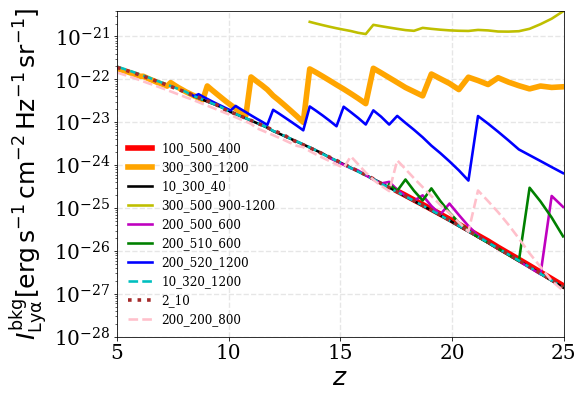

In [182]:
DIM = 100
filenames = np.array([])
for name in glob.glob('./limfast-master/limfast_bt/Boxes/Lyabkg*100_500*'):
    filenames = np.append(filenames,name)
    

meaneq = np.array([])
reds = np.array([])
for x in xrange(len(filenames)):
    filename = filenames[x]
    #print filename
    #filename = './limfast-master/Boxes/eq23mod/metallicity_z019.08_HIIfilter1_RHIImax50_200_300Mpc'
    
    data = load_binary_data(filename)
    data.shape = (DIM, DIM, DIM)
    data = data.reshape((DIM, DIM, DIM), order='F')
    #print (data)
    data = data.flatten()
    
    red = float(filename[42:48])
    #print red
    #afdsa
    #plt.hist(data, bins=np.logspace(np.log10(np.min(data)),np.log10(np.max(data)),50))
    #plt.xscale('log')
    #print 'log10 mean Z/Z_sun = ',np.log10(np.mean(data))
    #print 'log10 sigma Z/Zsun = ',np.log10(np.std(data))
    meaneq = np.append(meaneq,(np.mean(data)))
    #print meaneq23
    #ads
    #print np.log10(np.mean(data))
    reds = np.append(reds, red)
    #print np.median(np.log10(data/0.014))
    #plt.show()
    
sortindx = np.argsort(reds)
reds = reds[sortindx]
meaneq = meaneq[sortindx]

plt.semilogy(reds,meaneq,color= 'r',linewidth=5.6, label='100_500_400')

DIM = 300
filenames = np.array([])
for name in glob.glob('./limfast-master/limfast_bt/Boxes/Lyabkg*300_300*'):
    filenames = np.append(filenames,name)
    

meaneq = np.array([])
reds = np.array([])
for x in xrange(len(filenames)):
    filename = filenames[x]
    #print filename
    #filename = './limfast-master/Boxes/eq23mod/metallicity_z019.08_HIIfilter1_RHIImax50_200_300Mpc'
    
    data = load_binary_data(filename)
    data.shape = (DIM, DIM, DIM)
    data = data.reshape((DIM, DIM, DIM), order='F')
    #print (data)
    data = data.flatten()
    
    red = float(filename[42:48])
    #print red
    #afdsa
    #plt.hist(data, bins=np.logspace(np.log10(np.min(data)),np.log10(np.max(data)),50))
    #plt.xscale('log')
    #print 'log10 mean Z/Z_sun = ',np.log10(np.mean(data))
    #print 'log10 sigma Z/Zsun = ',np.log10(np.std(data))
    meaneq = np.append(meaneq,(np.mean(data)))
    #print meaneq23
    #ads
    #print np.log10(np.mean(data))
    reds = np.append(reds, red)
    #print np.median(np.log10(data/0.014))
    #plt.show()
    
sortindx = np.argsort(reds)
reds = reds[sortindx]
meaneq = meaneq[sortindx]

plt.semilogy(reds,meaneq,color= 'orange',linewidth=5.6, label='300_300_1200')



DIM = 10
filenames = np.array([])
for name in glob.glob('./limfast-master/limfast_bt/Boxes/Lyabkg*10_300*'):   # 40 high res
    filenames = np.append(filenames,name)
    

meaneq = np.array([])
reds = np.array([])
for x in xrange(len(filenames)):
    filename = filenames[x]
    #print filename
    #filename = './limfast-master/Boxes/eq23mod/metallicity_z019.08_HIIfilter1_RHIImax50_200_300Mpc'
    
    data = load_binary_data(filename)
    data.shape = (DIM, DIM, DIM)
    data = data.reshape((DIM, DIM, DIM), order='F')
    #print (data)
    data = data.flatten()
    
    red = float(filename[42:48])
    #print red
    #afdsa
    #plt.hist(data, bins=np.logspace(np.log10(np.min(data)),np.log10(np.max(data)),50))
    #plt.xscale('log')
    #print 'log10 mean Z/Z_sun = ',np.log10(np.mean(data))
    #print 'log10 sigma Z/Zsun = ',np.log10(np.std(data))
    meaneq = np.append(meaneq,(np.mean(data)))
    #print meaneq23
    #ads
    #print np.log10(np.mean(data))
    reds = np.append(reds, red)
    #print np.median(np.log10(data/0.014))
    #plt.show()
    
sortindx = np.argsort(reds)
reds = reds[sortindx]
meaneq = meaneq[sortindx]

plt.semilogy(reds,meaneq,color= 'k',linewidth=2.6, label='10_300_40')



DIM = 300
filenames = np.array([])
for name in glob.glob('./limfast-master/limfast_bt/Boxes/Lyabkg*300_500*'):
    filenames = np.append(filenames,name)
    

meaneq = np.array([])
reds = np.array([])
for x in xrange(len(filenames)):
    filename = filenames[x]
    #print filename
    #filename = './limfast-master/Boxes/eq23mod/metallicity_z019.08_HIIfilter1_RHIImax50_200_300Mpc'
    
    data = load_binary_data(filename)
    data.shape = (DIM, DIM, DIM)
    data = data.reshape((DIM, DIM, DIM), order='F')
    #print (data)
    data = data.flatten()
    
    red = float(filename[42:48])
    #print red
    #afdsa
    #plt.hist(data, bins=np.logspace(np.log10(np.min(data)),np.log10(np.max(data)),50))
    #plt.xscale('log')
    #print 'log10 mean Z/Z_sun = ',np.log10(np.mean(data))
    #print 'log10 sigma Z/Zsun = ',np.log10(np.std(data))
    meaneq = np.append(meaneq,(np.mean(data)))
    #print meaneq23
    #ads
    #print np.log10(np.mean(data))
    reds = np.append(reds, red)
    #print np.median(np.log10(data/0.014))
    #plt.show()
    
sortindx = np.argsort(reds)
reds = reds[sortindx]
meaneq = meaneq[sortindx]

plt.semilogy(reds,meaneq,color= 'y',linewidth=2.6, label='300_500_900-1200')



DIM = 200
filenames = np.array([])
for name in glob.glob('./limfast-master/limfast_bt/Boxes/Lyabkg*200_500*'):
    filenames = np.append(filenames,name)
    

meaneq = np.array([])
reds = np.array([])
for x in xrange(len(filenames)):
    filename = filenames[x]
    #print filename
    #filename = './limfast-master/Boxes/eq23mod/metallicity_z019.08_HIIfilter1_RHIImax50_200_300Mpc'
    
    data = load_binary_data(filename)
    data.shape = (DIM, DIM, DIM)
    data = data.reshape((DIM, DIM, DIM), order='F')
    #print (data)
    data = data.flatten()
    
    red = float(filename[42:48])
    #print red
    #afdsa
    #plt.hist(data, bins=np.logspace(np.log10(np.min(data)),np.log10(np.max(data)),50))
    #plt.xscale('log')
    #print 'log10 mean Z/Z_sun = ',np.log10(np.mean(data))
    #print 'log10 sigma Z/Zsun = ',np.log10(np.std(data))
    meaneq = np.append(meaneq,(np.mean(data)))
    #print meaneq23
    #ads
    #print np.log10(np.mean(data))
    reds = np.append(reds, red)
    #print np.median(np.log10(data/0.014))
    #plt.show()
    
sortindx = np.argsort(reds)
reds = reds[sortindx]
meaneq = meaneq[sortindx]

plt.semilogy(reds,meaneq,color= 'm',linewidth=2.6, label='200_500_600')



DIM = 200
filenames = np.array([])
for name in glob.glob('./limfast-master/limfast_bt/Boxes/Lyabkg*200_510*'):  # 600 high res
    filenames = np.append(filenames,name)
    

meaneq = np.array([])
reds = np.array([])
for x in xrange(len(filenames)):
    filename = filenames[x]
    #print filename
    #filename = './limfast-master/Boxes/eq23mod/metallicity_z019.08_HIIfilter1_RHIImax50_200_300Mpc'
    
    data = load_binary_data(filename)
    data.shape = (DIM, DIM, DIM)
    data = data.reshape((DIM, DIM, DIM), order='F')
    #print (data)
    data = data.flatten()
    
    red = float(filename[42:48])
    #print red
    #afdsa
    #plt.hist(data, bins=np.logspace(np.log10(np.min(data)),np.log10(np.max(data)),50))
    #plt.xscale('log')
    #print 'log10 mean Z/Z_sun = ',np.log10(np.mean(data))
    #print 'log10 sigma Z/Zsun = ',np.log10(np.std(data))
    meaneq = np.append(meaneq,(np.mean(data)))
    #print meaneq23
    #ads
    #print np.log10(np.mean(data))
    reds = np.append(reds, red)
    #print np.median(np.log10(data/0.014))
    #plt.show()
    
sortindx = np.argsort(reds)
reds = reds[sortindx]
meaneq = meaneq[sortindx]

plt.semilogy(reds,meaneq,color= 'g',linewidth=2.6, label='200_510_600')


DIM = 200
filenames = np.array([])
for name in glob.glob('./limfast-master/limfast_bt/Boxes/Lyabkg*200_520*'):   #1200 high res
    filenames = np.append(filenames,name)
    

meaneq = np.array([])
reds = np.array([])
for x in xrange(len(filenames)):
    filename = filenames[x]
    #print filename
    #filename = './limfast-master/Boxes/eq23mod/metallicity_z019.08_HIIfilter1_RHIImax50_200_300Mpc'
    
    data = load_binary_data(filename)
    data.shape = (DIM, DIM, DIM)
    data = data.reshape((DIM, DIM, DIM), order='F')
    #print (data)
    data = data.flatten()
    
    red = float(filename[42:48])
    #print red
    #afdsa
    #plt.hist(data, bins=np.logspace(np.log10(np.min(data)),np.log10(np.max(data)),50))
    #plt.xscale('log')
    #print 'log10 mean Z/Z_sun = ',np.log10(np.mean(data))
    #print 'log10 sigma Z/Zsun = ',np.log10(np.std(data))
    meaneq = np.append(meaneq,(np.mean(data)))
    #print meaneq23
    #ads
    #print np.log10(np.mean(data))
    reds = np.append(reds, red)
    #print np.median(np.log10(data/0.014))
    #plt.show()
    
sortindx = np.argsort(reds)
reds = reds[sortindx]
meaneq = meaneq[sortindx]

plt.semilogy(reds,meaneq,color= 'b',linewidth=2.6, label='200_520_1200')



DIM = 10
filenames = np.array([])
for name in glob.glob('./limfast-master/limfast_bt/Boxes/Lyabkg*10_320*'):   #1200 high res
    filenames = np.append(filenames,name)
    

meaneq = np.array([])
reds = np.array([])
for x in xrange(len(filenames)):
    filename = filenames[x]
    #print filename
    #filename = './limfast-master/Boxes/eq23mod/metallicity_z019.08_HIIfilter1_RHIImax50_200_300Mpc'
    
    data = load_binary_data(filename)
    data.shape = (DIM, DIM, DIM)
    data = data.reshape((DIM, DIM, DIM), order='F')
    #print (data)
    data = data.flatten()
    
    red = float(filename[42:48])
    #print red
    #afdsa
    #plt.hist(data, bins=np.logspace(np.log10(np.min(data)),np.log10(np.max(data)),50))
    #plt.xscale('log')
    #print 'log10 mean Z/Z_sun = ',np.log10(np.mean(data))
    #print 'log10 sigma Z/Zsun = ',np.log10(np.std(data))
    meaneq = np.append(meaneq,(np.mean(data)))
    #print meaneq23
    #ads
    #print np.log10(np.mean(data))
    reds = np.append(reds, red)
    #print np.median(np.log10(data/0.014))
    #plt.show()
    
sortindx = np.argsort(reds)
reds = reds[sortindx]
meaneq = meaneq[sortindx]

plt.semilogy(reds,meaneq,color= 'c',linestyle='dashed',linewidth=2.6, label='10_320_1200')

DIM = 2
filenames = np.array([])
for name in glob.glob('./limfast-master/limfast_bt/Boxes/Lyabkg*2_10M*'):   #1200 high res
    filenames = np.append(filenames,name)
    

meaneq = np.array([])
reds = np.array([])
for x in xrange(len(filenames)):
    filename = filenames[x]
    #print filename
    #filename = './limfast-master/Boxes/eq23mod/metallicity_z019.08_HIIfilter1_RHIImax50_200_300Mpc'
    
    data = load_binary_data(filename)
    data.shape = (DIM, DIM, DIM)
    data = data.reshape((DIM, DIM, DIM), order='F')
    #print (data)
    data = data.flatten()
    
    red = float(filename[42:48])
    #print red
    #afdsa
    #plt.hist(data, bins=np.logspace(np.log10(np.min(data)),np.log10(np.max(data)),50))
    #plt.xscale('log')
    #print 'log10 mean Z/Z_sun = ',np.log10(np.mean(data))
    #print 'log10 sigma Z/Zsun = ',np.log10(np.std(data))
    meaneq = np.append(meaneq,(np.mean(data)))
    #print meaneq23
    #ads
    #print np.log10(np.mean(data))
    reds = np.append(reds, red)
    #print np.median(np.log10(data/0.014))
    #plt.show()
    
sortindx = np.argsort(reds)
reds = reds[sortindx]
meaneq = meaneq[sortindx]

plt.semilogy(reds,meaneq,color= 'brown',linestyle='dotted',linewidth=3.6, label='2_10')


DIM = 200
filenames = np.array([])
for name in glob.glob('./limfast-master/limfast_bt/Boxes/Lyabkg*200_200*'):   #1200 high res
    filenames = np.append(filenames,name)
    

meaneq = np.array([])
reds = np.array([])
for x in xrange(len(filenames)):
    filename = filenames[x]
    #print filename
    #filename = './limfast-master/Boxes/eq23mod/metallicity_z019.08_HIIfilter1_RHIImax50_200_300Mpc'
    
    data = load_binary_data(filename)
    data.shape = (DIM, DIM, DIM)
    data = data.reshape((DIM, DIM, DIM), order='F')
    #print (data)
    data = data.flatten()
    
    red = float(filename[42:48])
    #print red
    #afdsa
    #plt.hist(data, bins=np.logspace(np.log10(np.min(data)),np.log10(np.max(data)),50))
    #plt.xscale('log')
    #print 'log10 mean Z/Z_sun = ',np.log10(np.mean(data))
    #print 'log10 sigma Z/Zsun = ',np.log10(np.std(data))
    meaneq = np.append(meaneq,(np.mean(data)))
    #print meaneq23
    #ads
    #print np.log10(np.mean(data))
    reds = np.append(reds, red)
    #print np.median(np.log10(data/0.014))
    #plt.show()
    
sortindx = np.argsort(reds)
reds = reds[sortindx]
meaneq = meaneq[sortindx]

plt.semilogy(reds,meaneq,color= 'pink',linestyle='dashed',linewidth=2.6, label='200_200_800')


plt.xlabel(r'$z$',fontsize=25)
plt.ylabel(r'$I_{\rm Ly\alpha}^{\rm bkg} {\rm [erg\, s^{-1}\,cm^{-2}\,Hz^{-1}\,sr^{-1}]}$',fontsize=25)
ax = plt.gca()
plt.gca().set_facecolor("white")
plt.setp(ax.spines.values(), color='k')
plt.grid(True,color='0.9',linestyle='dashed',linewidth=1.4)
plt.legend(loc='best',frameon=False,prop={'size': 12})
plt.xlim(5,25)
plt.ylim(1e-28,4e-21)
plt.show()

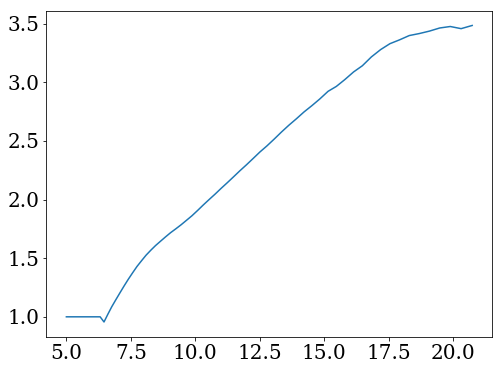

In [504]:
plt.plot(zzs,lyaigm_orig/lyaigm)
#plt.plot(zzs, (1 + zzs))

## Ha

/Users/masribas/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  if __name__ == '__main__':


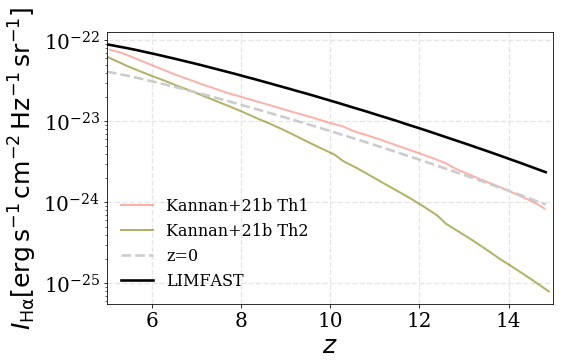

In [222]:
filenames = np.array([])
for name in glob.glob('./limfast-master/limfast_bt/Boxes/I_HI65*200_500*'):
    filenames = np.append(filenames,name)
    


meaneq = np.array([])
reds = np.array([])
for x in xrange(len(filenames)):
    filename = filenames[x]
    #print filename
    #filename = './limfast-master/Boxes/eq23mod/metallicity_z019.08_HIIfilter1_RHIImax50_200_300Mpc'
    
    data = load_binary_data(filename)
    data.shape = (DIM, DIM, DIM)
    data = data.reshape((DIM, DIM, DIM), order='F')
    #print (data)
    data = data.flatten()
    
    red = float(filename[45:51])
    #print red
    #afdsa
    #plt.hist(data, bins=np.logspace(np.log10(np.min(data)),np.log10(np.max(data)),50))
    #plt.xscale('log')
    #print 'log10 mean Z/Z_sun = ',np.log10(np.mean(data))
    #print 'log10 sigma Z/Zsun = ',np.log10(np.std(data))
    meaneq = np.append(meaneq,(np.mean(data)))
    #print meaneq23
    #ads
    #print np.log10(np.mean(data))
    reds = np.append(reds, red)
    #print np.median(np.log10(data/0.014))
    #plt.show()
    
sortindx = np.argsort(reds)
reds = reds[sortindx]
meaneq = meaneq[sortindx]    * 0.9
    
plt.figure(figsize=(8,5))


z, sf = np.loadtxt('./thha1.txt',usecols=(0,1),unpack=True)
sf *= 1e-23
plt.semilogy(z,sf,color= 'salmon',linewidth=2,label='Kannan+21b Th1',alpha=0.6)

z, sf = np.loadtxt('./thha2.txt',usecols=(0,1),unpack=True)
sf *= 1e-23
plt.semilogy(z,sf,color= 'olive',linewidth=2,label='Kannan+21b Th2',alpha=0.6)



theo =  sfrha(supersfrd)[0]*sfrha(5)[1]*1e-13*Chir(superz)**2/ hubble(superz)/4./np.pi/dL(superz)**2*(1+superz)**2
#print theo
plt.semilogy(superz,theo,color= '0.8', linewidth=2.6, linestyle='dashed', label='z=0')




plt.semilogy(reds,meaneq,color= 'k',linewidth=2.6, label='LIMFAST')
plt.xlabel(r'$z$',fontsize=25)
plt.ylabel(r'$I_{\rm H\alpha} {\rm [erg\, s^{-1}\,cm^{-2}\,Hz^{-1}\,sr^{-1}]}$',fontsize=25)
plt.xlim(5,15)
plt.legend(loc='best',frameon=False,prop={'size': 16})
ax = plt.gca()
plt.gca().set_facecolor("white")
plt.setp(ax.spines.values(), color='k')
plt.grid(True,color='0.9',linestyle='dashed',linewidth=1.4)


## Hb

/Users/masribas/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  if __name__ == '__main__':


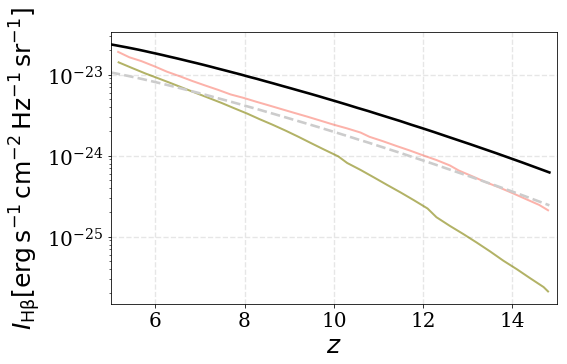

In [223]:
filenames = np.array([])
for name in glob.glob('./limfast-master/limfast_bt/Boxes/I_HI4*200_500*'):
    filenames = np.append(filenames,name)
    


meaneq = np.array([])
reds = np.array([])
for x in xrange(len(filenames)):
    filename = filenames[x]
    #print filename
    #filename = './limfast-master/Boxes/eq23mod/metallicity_z019.08_HIIfilter1_RHIImax50_200_300Mpc'
    
    data = load_binary_data(filename)
    data.shape = (DIM, DIM, DIM)
    data = data.reshape((DIM, DIM, DIM), order='F')
    #print (data)
    data = data.flatten()
    
    red = float(filename[45:51])
    #print red
    #afdsa
    #plt.hist(data, bins=np.logspace(np.log10(np.min(data)),np.log10(np.max(data)),50))
    #plt.xscale('log')
    #print 'log10 mean Z/Z_sun = ',np.log10(np.mean(data))
    #print 'log10 sigma Z/Zsun = ',np.log10(np.std(data))
    meaneq = np.append(meaneq,(np.mean(data)))
    #print meaneq23
    #ads
    #print np.log10(np.mean(data))
    reds = np.append(reds, red)
    #print np.median(np.log10(data/0.014))
    #plt.show()
    
sortindx = np.argsort(reds)
reds = reds[sortindx]
meaneq = meaneq[sortindx] * 0.9
    
plt.figure(figsize=(8,5))



z, sf = np.loadtxt('./thhb1.txt',usecols=(0,1),unpack=True)
sf *= 1e-23
plt.semilogy(z,sf,color= 'salmon',linewidth=2,label='Kannan+21b Th1',alpha=0.6)

z, sf = np.loadtxt('./thhb2.txt',usecols=(0,1),unpack=True)
sf *= 1e-23
plt.semilogy(z,sf,color= 'olive',linewidth=2,label='Kannan+21b Th2',alpha=0.6)

theo =  sfrhb(supersfrd)[0]*sfrhb(5)[1]*1e-13*Chir(superz)**2/ hubble(superz)/4./np.pi/dL(superz)**2*(1+superz)**2
#print theo
plt.semilogy(superz,theo,color= '0.8', linewidth=2.6, linestyle='dashed', label='z=0')


plt.semilogy(reds,meaneq,color= 'k',linewidth=2.6, label='LIMFAST')
plt.xlabel(r'$z$',fontsize=25)
plt.ylabel(r'$I_{\rm H\beta} {\rm [erg\, s^{-1}\,cm^{-2}\,Hz^{-1}\,sr^{-1}]}$',fontsize=25)
plt.xlim(5,15)
#plt.legend(loc='best',frameon=False,prop={'size': 16})
ax = plt.gca()
plt.gca().set_facecolor("white")
plt.setp(ax.spines.values(), color='k')
plt.grid(True,color='0.9',linestyle='dashed',linewidth=1.4)


## OII

/Users/masribas/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  if __name__ == '__main__':


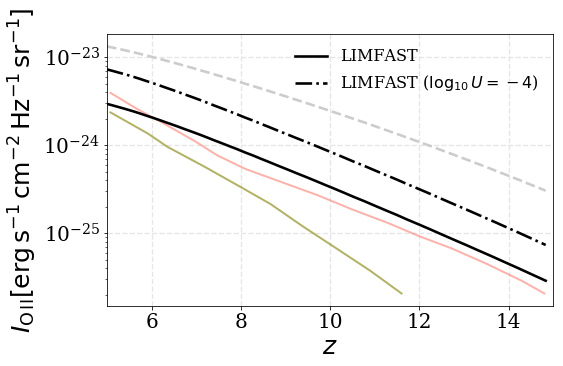

In [225]:
filenames = np.array([])
for name in glob.glob('./limfast-master/limfast_bt/Boxes/I_OII3726A_z*200_500*'):
    filenames = np.append(filenames,name)
    


meaneq = np.array([])
reds = np.array([])
for x in xrange(len(filenames)):
    filename = filenames[x]
    #print filename
    #filename = './limfast-master/Boxes/eq23mod/metallicity_z019.08_HIIfilter1_RHIImax50_200_300Mpc'
    
    data = load_binary_data(filename)
    data.shape = (DIM, DIM, DIM)
    data = data.reshape((DIM, DIM, DIM), order='F')
    #print (data)
    data = data.flatten()
    
    red = float(filename[46:52])
    #print red
    #afdsa
    #plt.hist(data, bins=np.logspace(np.log10(np.min(data)),np.log10(np.max(data)),50))
    #plt.xscale('log')
    #print 'log10 mean Z/Z_sun = ',np.log10(np.mean(data))
    #print 'log10 sigma Z/Zsun = ',np.log10(np.std(data))
    meaneq = np.append(meaneq,(np.mean(data)))
    #print meaneq23
    #ads
    #print np.log10(np.mean(data))
    reds = np.append(reds, red)
    #print np.median(np.log10(data/0.014))
    #plt.show()
    
sortindx = np.argsort(reds)
reds = reds[sortindx]
meaneq = meaneq[sortindx]  * 0.9
    
plt.figure(figsize=(8,5))


z, sf = np.loadtxt('./thoii1.txt',usecols=(0,1),unpack=True)
sf *= 1e-23
plt.semilogy(z,sf,color= 'salmon',linewidth=2,alpha=0.6)

z, sf = np.loadtxt('./thoii2.txt',usecols=(0,1),unpack=True)
sf *= 1e-23
plt.semilogy(z,sf,color= 'olive',linewidth=2,alpha=0.6)

theo =  sfroii(supersfrd)[0]*sfroii(5)[1]*1e-13*Chir(superz)**2/ hubble(superz)/4./np.pi/dL(superz)**2*(1+superz)**2
#print theo
plt.semilogy(superz,theo,color= '0.8', linewidth=2.6, linestyle='dashed')


plt.semilogy(reds,meaneq,color= 'k',linewidth=2.6, label=r'LIMFAST') # ($\log_{10} \,U=-2$)








filenames = np.array([])
for name in glob.glob('./limfast-master/limfast_bt/Boxes/I_OII3726A_U*200_500*'):
    filenames = np.append(filenames,name)
    


meaneq = np.array([])
reds = np.array([])
for x in xrange(len(filenames)):
    filename = filenames[x]
    #print filename
    #filename = './limfast-master/Boxes/eq23mod/metallicity_z019.08_HIIfilter1_RHIImax50_200_300Mpc'
    
    data = load_binary_data(filename)
    data.shape = (DIM, DIM, DIM)
    data = data.reshape((DIM, DIM, DIM), order='F')
    #print (data)
    data = data.flatten()
    
    red = float(filename[50:56])
    #print red
    #afdsa
    #plt.hist(data, bins=np.logspace(np.log10(np.min(data)),np.log10(np.max(data)),50))
    #plt.xscale('log')
    #print 'log10 mean Z/Z_sun = ',np.log10(np.mean(data))
    #print 'log10 sigma Z/Zsun = ',np.log10(np.std(data))
    meaneq = np.append(meaneq,(np.mean(data)))
    #print meaneq23
    #ads
    #print np.log10(np.mean(data))
    reds = np.append(reds, red)
    #print np.median(np.log10(data/0.014))
    #plt.show()
    
sortindx = np.argsort(reds)
reds = reds[sortindx]
meaneq = meaneq[sortindx]  * 0.9


plt.semilogy(reds,meaneq,color= 'k',linewidth=2.6, linestyle='dashdot',label=r'LIMFAST ($\log_{10} \,U=-4$)') # ($\log_{10} \,U=-2$)
plt.xlabel(r'$z$',fontsize=25)
plt.ylabel(r'$I_{\rm H\beta} {\rm [erg\, s^{-1}\,cm^{-2}\,Hz^{-1}\,sr^{-1}]}$',fontsize=25)
plt.xlim(5,15)
plt.legend(loc='best',frameon=False,prop={'size': 16})


plt.ylabel(r'$I_{\rm O\,II} {\rm [erg\, s^{-1}\,cm^{-2}\,Hz^{-1}\,sr^{-1}]}$',fontsize=25)
ax = plt.gca()
plt.gca().set_facecolor("white")
plt.setp(ax.spines.values(), color='k')
plt.grid(True,color='0.9',linestyle='dashed',linewidth=1.4)


## OIII

/Users/masribas/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  if __name__ == '__main__':


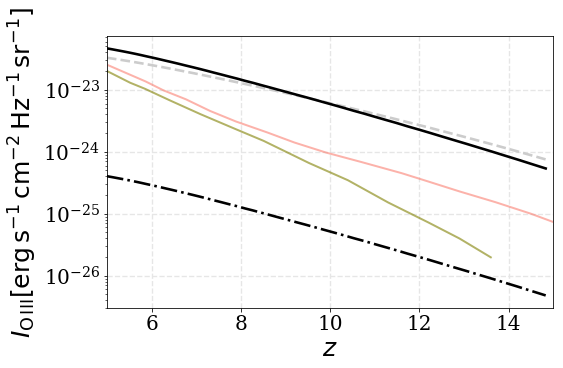

In [226]:
filenames = np.array([])
for name in glob.glob('./limfast-master/limfast_bt/Boxes/I_OIII5007A_z*200_500*'):
    filenames = np.append(filenames,name)
    


meaneq = np.array([])
reds = np.array([])
for x in xrange(len(filenames)):
    filename = filenames[x]
    #print filename
    #filename = './limfast-master/Boxes/eq23mod/metallicity_z019.08_HIIfilter1_RHIImax50_200_300Mpc'
    
    data = load_binary_data(filename)
    data.shape = (DIM, DIM, DIM)
    data = data.reshape((DIM, DIM, DIM), order='F')
    #print (data)
    data = data.flatten()

    
    red = float(filename[47:53])
    #print red
    #afdsa
    #plt.hist(data, bins=np.logspace(np.log10(np.min(data)),np.log10(np.max(data)),50))
    #plt.xscale('log')
    #print 'log10 mean Z/Z_sun = ',np.log10(np.mean(data))
    #print 'log10 sigma Z/Zsun = ',np.log10(np.std(data))
    meaneq = np.append(meaneq,(np.mean(data)))
    #print meaneq
    #print meaneq23
    #ads
    #print np.log10(np.mean(data))
    reds = np.append(reds, red)
    #print np.median(np.log10(data/0.014))
    #plt.show()
    
sortindx = np.argsort(reds)
reds = reds[sortindx]
meaneq = meaneq[sortindx] * 0.9

plt.figure(figsize=(8,5))

z, sf = np.loadtxt('./thoiii1.txt',usecols=(0,1),unpack=True)
sf *= 1e-23
plt.semilogy(z,sf,color= 'salmon',linewidth=2,alpha=0.6)

z, sf = np.loadtxt('./thoiii2.txt',usecols=(0,1),unpack=True)
sf *= 1e-23
plt.semilogy(z,sf,color= 'olive',linewidth=2,alpha=0.6)

theo =  sfroiii(supersfrd)[0]*sfroiii(5)[1]*1e-13*Chir(superz)**2/ hubble(superz)/4./np.pi/dL(superz)**2*(1+superz)**2
#print theo
plt.semilogy(superz,theo,color= '0.8', linewidth=2.6, linestyle='dashed')


plt.semilogy(reds,meaneq,color= 'k',linewidth=2.6, label=r'LIMFAST') # ($\log_{10} \,U=-2$)





filenames = np.array([])
for name in glob.glob('./limfast-master/limfast_bt/Boxes/I_OIII5007A_U*200_500*'):
    filenames = np.append(filenames,name)
    


meaneq = np.array([])
reds = np.array([])
for x in xrange(len(filenames)):
    filename = filenames[x]
    #continue
    #print filename
    #filename = './limfast-master/Boxes/eq23mod/metallicity_z019.08_HIIfilter1_RHIImax50_200_300Mpc'
    
    data = load_binary_data(filename)
    data.shape = (DIM, DIM, DIM)
    data = data.reshape((DIM, DIM, DIM), order='F')
    #print (data)
    data = data.flatten()
    #print data
    #asdfa
    
    red = float(filename[51:57])
    #print red
    #afdsa
    #plt.hist(data, bins=np.logspace(np.log10(np.min(data)),np.log10(np.max(data)),50))
    #plt.xscale('log')
    #print 'log10 mean Z/Z_sun = ',np.log10(np.mean(data))
    #print 'log10 sigma Z/Zsun = ',np.log10(np.std(data))
    meaneq = np.append(meaneq,(np.mean(data)))
    #print meaneq23
    #ads
    #print np.log10(np.mean(data))
    reds = np.append(reds, red)
    #print np.median(np.log10(data/0.014))
    #plt.show()
    
sortindx = np.argsort(reds)
reds = reds[sortindx]
meaneq = meaneq[sortindx] * 0.9



plt.semilogy(reds,meaneq,color= 'k',linewidth=2.6, linestyle='dashdot', label=r'LIMFAST ($\log_{10} \,U=-4$)') # ($\log_{10} \,U=-2$)
plt.xlabel(r'$z$',fontsize=25)
plt.xlim(5,15)
#plt.legend(loc='best',frameon=False,prop={'size': 16})

plt.ylabel(r'$I_{\rm O\,III} {\rm [erg\, s^{-1}\,cm^{-2}\,Hz^{-1}\,sr^{-1}]}$',fontsize=25)
ax = plt.gca()
plt.gca().set_facecolor("white")
plt.setp(ax.spines.values(), color='k')
plt.grid(True,color='0.9',linestyle='dashed',linewidth=1.4)


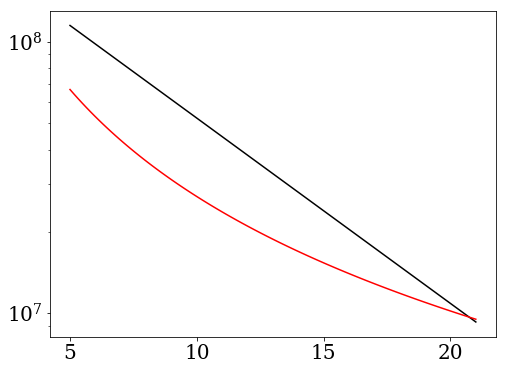

In [399]:
ziip = np.linspace(5,21,100)
rick = 10**(-3.0/44.0 * ziip + 8.4)
Omz = cosmo.Om0*(1+ziip)**3 / (cosmo.Om0*(1+ziip)**3 + cosmo.Ode0)
d = Omz - 1
dens = 19*np.pi**2 + 82.*d - 39.*d**2



andrei = 7030.97/0.7 *np.sqrt(Omz/cosmo.Om0/dens) *(1e4/1.22/(1+ziip))**1.5
plt.semilogy(ziip,rick,'k')
plt.semilogy(ziip,andrei,'r')